<a href="https://colab.research.google.com/github/crlshnrq/Color-Pi/blob/main/Py_colorgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import requests, re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from numpy import random

Recenbedo a quantidade de cores (ou valores depois da virgula) que o programa irá imprimir. (Máximo de 1302 valores)

In [59]:
entrada = int(input('Quantas cores quer imprimir? '))

Quantas cores quer imprimir? 1302


Usando requests e beutifulsoup para receber os dados de um github com a conversão de pi para hex

In [68]:
response = requests.get("https://gist.githubusercontent.com/retrohacker/e5fff72b7b75ee058924/raw/4332bbf48370cc7b41da12ad2d02a9a7a4189909/pi.text")
soup = BeautifulSoup(response.text, 'html.parser')
soup = '3' + str(soup)

Aplicando regular expressions para agrupar os valores em conjuntos de 6

In [69]:
soupRegex = re.compile("([A-Z0-9]{6})")
soupFind = soupRegex.findall(soup)


Adicionando # no inicio de cada cor.

In [70]:
colors = ["#" + hash for hash in soupFind]
print(colors)

['#3243F6', '#A8885A', '#308D31', '#3198A2', '#E03707', '#344A40', '#938222', '#99F31D', '#0082EF', '#A98EC4', '#452821', '#E638D0', '#1377BE', '#5466CF', '#34E90C', '#6CC0AC', '#29B7C9', '#7C50DD', '#3F84D5', '#B5B547', '#9216D5', '#D98979', '#FB1BD1', '#310BA6', '#98DFB5', '#AC2FFD', '#72DBD0', '#1ADFB7', '#B8E1AF', '#ED6A26', '#BA7C90', '#45F12C', '#7F9924', '#A19947', '#B3916C', '#F70801', '#F2E285', '#8EFC16', '#636920', '#D87157', '#A458FE', '#A3F493', '#3D7E0D', '#95748F', '#728EB6', '#58718B', '#CD5882', '#154AEE', '#7B54A4', '#1DC25A', '#9C30D5', '#392AF2', '#6013C5', '#D1B023', '#286085', '#F0CA41', '#7918B8', '#DB38EF', '#8E79DC', '#B0603A', '#6C9E0E', '#8BB01E', '#8A3ED7', '#1577C1', '#BD314B', '#2778AF', '#2FDA55', '#605C60', '#E65525', '#F3AA55', '#574898', '#6263E8', '#144055', '#CA396A', '#2AAB10', '#B6B4CC', '#5C3411', '#41E8CE', '#A15486', '#AF7C72', '#B3EE14', '#11636F', '#BC2A2B', '#A9C55D', '#741831', '#F6CE5C', '#3E169B', '#87931E', '#AFD6BA', '#336C24', '#7A3253'

Criando a quantidade de dados necessária para a plotagem da quantidade de cores escolhida. 

In [6]:
x, y = [], []
grid = entrada//20
for linha in range(grid):
  for coluna in range(20):
    x.append(linha)
    y.append(coluna)

Plotando os pontos (debug)

In [ ]:
fig = plt.figure()
fig.set_size_inches(15,20)
ax = fig.add_subplot()
for i in range(len(x)):
  ax.scatter(y[i],x[i], marker = 's', color = colors[i], s = 1000)
plt.axis("off")
plt.show()

Cria o array do tamanho da entrada e com numero de colunas definido por ncolunas.

In [71]:
temp = []
data = []
ncolunas = 50
count = 0
for i in range(entrada):
  temp.append(i)
  count +=1
  if count == ncolunas:
    data.append(temp)
    count = 0
    temp = []
data = np.array(data)
print(data)

[[   0    1    2 ...   47   48   49]
 [  50   51   52 ...   97   98   99]
 [ 100  101  102 ...  147  148  149]
 ...
 [1150 1151 1152 ... 1197 1198 1199]
 [1200 1201 1202 ... 1247 1248 1249]
 [1250 1251 1252 ... 1297 1298 1299]]


(-0.5, 49.5, 25.5, -0.5)

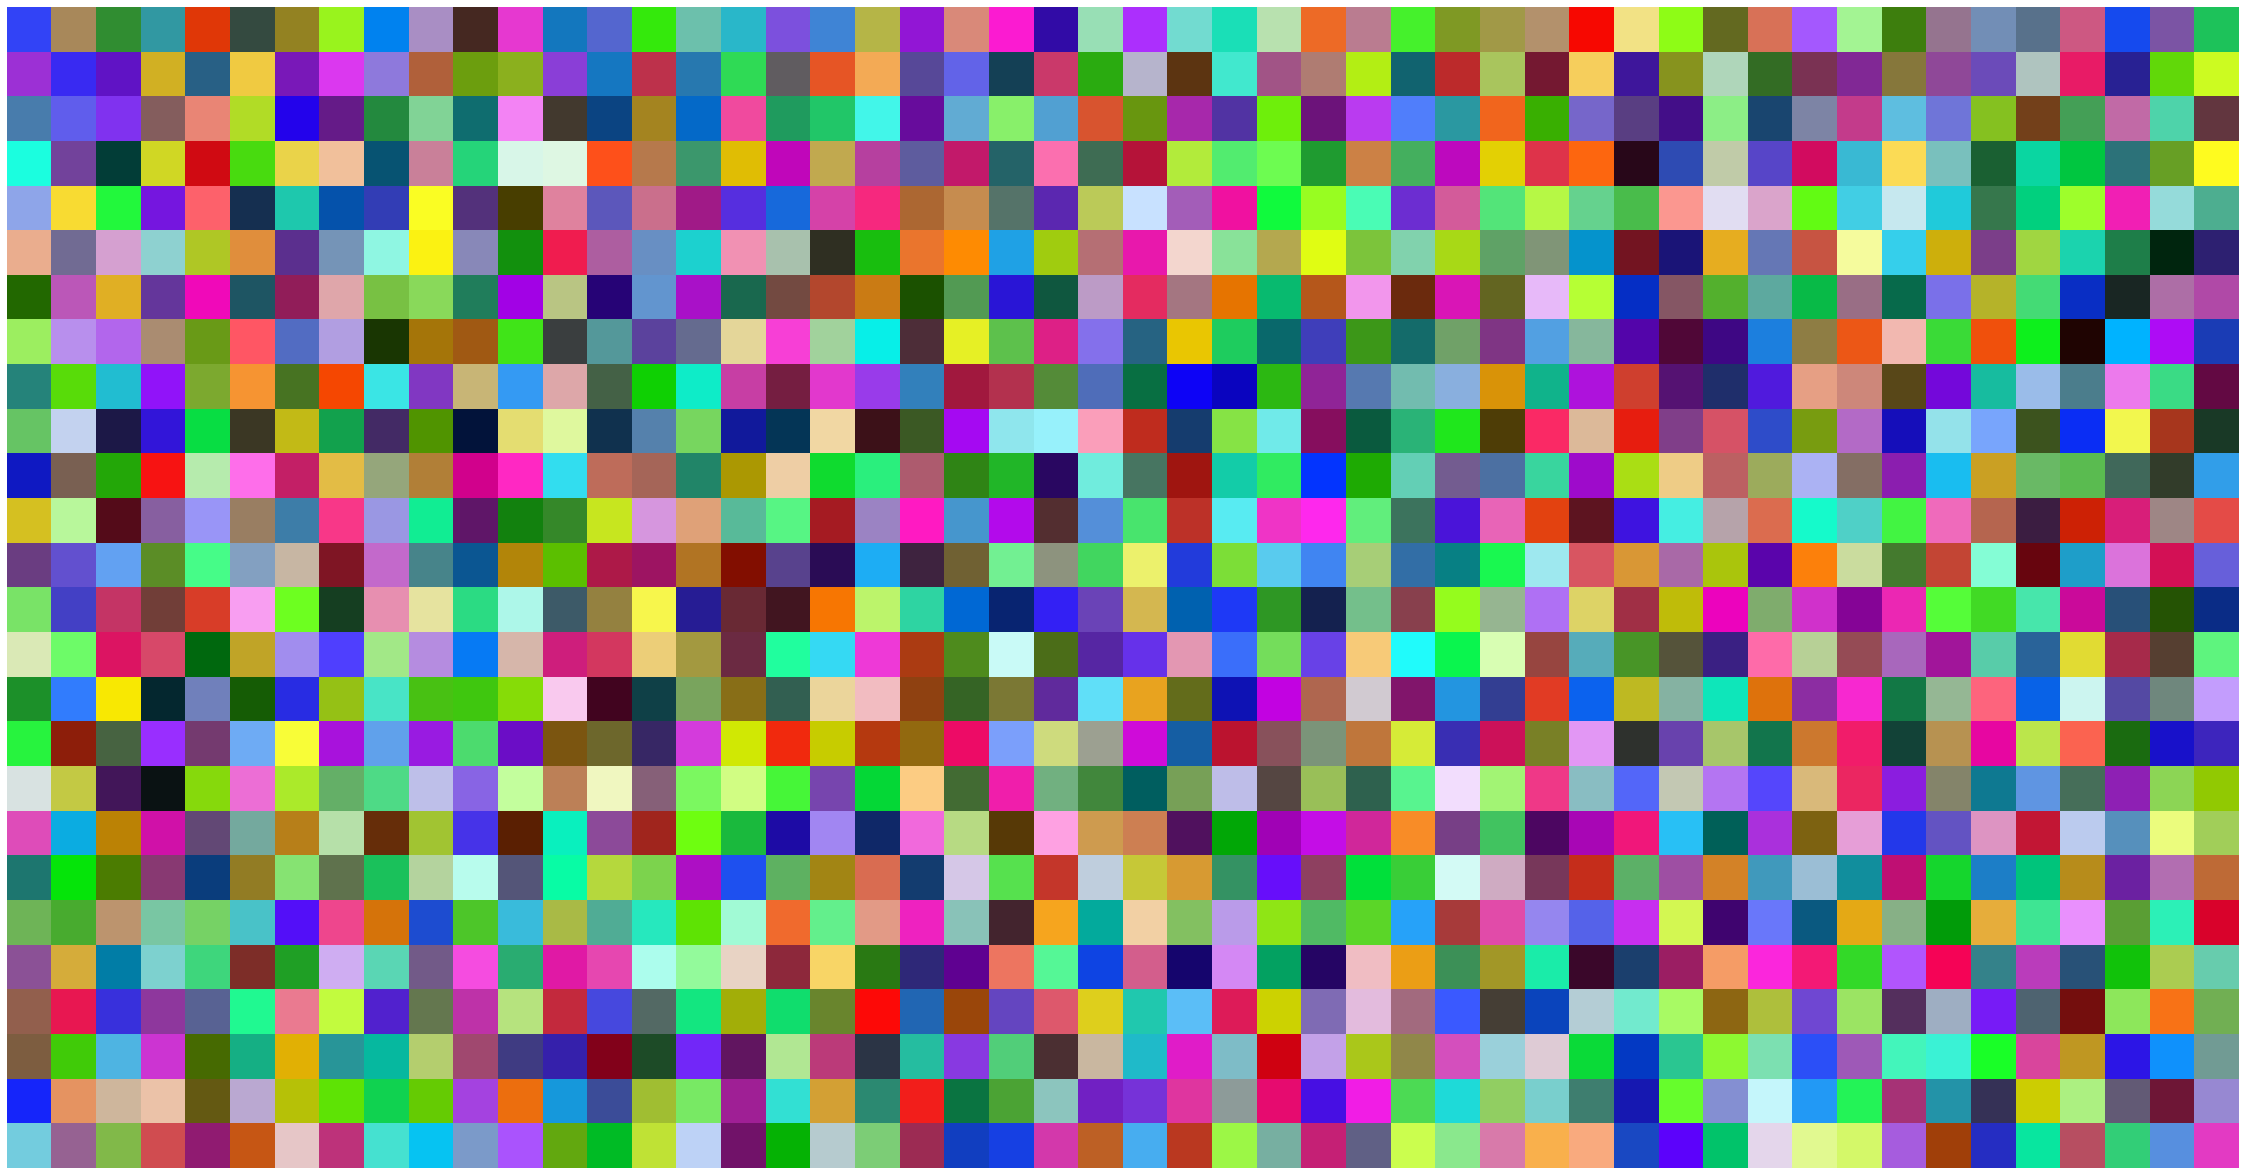

In [75]:
fig = plt.figure()
fig.set_size_inches(40,40)
cmap=matplotlib.colors.ListedColormap(colors)
plt.imshow(data, aspect="equal", cmap=cmap)
plt.axis("off")